## DAB200 -- Graded Lab 2

In this lab, you will gain some experience in denoising numeric features and feature importance so they can be used in a machine learning model.

**Target**: to predict `SalePrice`


**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1 | data1.csv |
| 2 | data2.csv |
| 3 | data3.csv |
| ... | ....csv |
| 16 | data16.csv |

**Dataset Description**: make sure to read the data description to get familiar with the features!

**Important Notes:**
- Use [Chapter 5](https://mlbook.explained.ai/prep.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


### Part 0

Please provide the following information:
 - Group - 3 
 - 1. Nrupendra Kumar,
   2. Vijaykanth.

     

### Part 1 - Create and evaluate an initial model

In this part you should: 
 - read in the data
 - isolate all non-numeric features from original data set
 - verify there are no missing values
 - create and evaluate a baseline model 

#### Code (15 marks)

### READING THE DATA

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data3.csv")
data.shape

(2043, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,985,90,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,COD,Normal,126000.0
1,1542,50,RM,53.0,5830,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
2,2666,120,RL,48.0,6373,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,New,Partial,NaN
3,1007,20,RL,NaN,12155,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,163500.0
4,237,20,RL,65.0,8773,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,185500.0


In [4]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            2
LotFrontage       331
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1029
Length: 81, dtype: int64

In [5]:
num_data = data[data.select_dtypes(exclude=["object"]).columns]

In [6]:
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,985,90,75.0,10125,5,5,1977,1977,0.0,0.0,...,0,0,0,0,0,0,0,8,2009,126000.0
1,1542,50,53.0,5830,5,6,1950,1997,0.0,788.0,...,0,0,0,0,0,0,0,3,2010,NaN
2,2666,120,48.0,6373,9,5,2006,2006,572.0,415.0,...,228,75,0,0,0,0,0,6,2006,NaN
3,1007,20,NaN,12155,6,3,1970,1970,0.0,1237.0,...,0,0,0,0,147,0,0,3,2007,163500.0
4,237,20,65.0,8773,7,5,2004,2004,98.0,24.0,...,132,105,0,0,0,0,0,5,2010,185500.0


In [7]:
num_data.shape

(2043, 38)

In [8]:
num_data.isnull().sum()

Id                  0
MSSubClass          0
LotFrontage       331
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         17
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt        93
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1029
dtype: int64

In [9]:
rent_drop_null= num_data.dropna()

In [10]:
rent_drop_null.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,985,90,75.0,10125,5,5,1977,1977,0.0,0.0,...,0,0,0,0,0,0,0,8,2009,126000.0
4,237,20,65.0,8773,7,5,2004,2004,98.0,24.0,...,132,105,0,0,0,0,0,5,2010,185500.0
6,708,120,48.0,6240,8,5,2006,2006,176.0,863.0,...,192,38,0,0,0,0,0,12,2009,254000.0
7,111,50,75.0,9525,6,4,1954,1972,0.0,444.0,...,182,0,0,0,0,0,0,10,2006,136900.0
11,659,50,78.0,17503,6,5,1948,1950,0.0,0.0,...,192,0,0,0,0,0,0,1,2010,97500.0


In [11]:
rent_drop_null.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [12]:
x = rent_drop_null.drop('SalePrice', axis=1)
y = rent_drop_null['SalePrice']

In [13]:
x.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,985,90,75.0,10125,5,5,1977,1977,0.0,0.0,...,539.0,0,0,0,0,0,0,0,8,2009
4,237,20,65.0,8773,7,5,2004,2004,98.0,24.0,...,494.0,132,105,0,0,0,0,0,5,2010
6,708,120,48.0,6240,8,5,2006,2006,176.0,863.0,...,550.0,192,38,0,0,0,0,0,12,2009
7,111,50,75.0,9525,6,4,1954,1972,0.0,444.0,...,325.0,182,0,0,0,0,0,0,10,2006
11,659,50,78.0,17503,6,5,1948,1950,0.0,0.0,...,330.0,192,0,0,0,0,0,0,1,2010


In [14]:
y.head()

0     126000.0
4     185500.0
6     254000.0
7     136900.0
11     97500.0
Name: SalePrice, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
X = rent_drop_null  
y = rent_drop_null['SalePrice']  

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True)

In [19]:
oob_scores = []
mae_scores = []
oob_score = rf.oob_score
oob_scores.append(oob_score)

# Print the OOB score
oob_baseline = rf.oob_score
print(f"Out-of-bag R^2 for baseline model is: {oob_baseline}")

Out-of-bag R^2 for baseline model is: True


In [50]:
predictions = rf.predict(X)
e = mean_absolute_error(y, predictions)
ep = e*100.0/y.mean()
mae_scores.append(ep)
avg_mae = np.mean(mae_scores)
print(f"Average Mean Absolute Error (MAE) for the model: {avg_mae}")

Average Mean Absolute Error (MAE) for the model: 0.40054052344219543


In [19]:
train_r2=[]
train_mae=[]
val_r2 = []
val_mae=[]
for i in range(10):
    X_train ,X_val, y_train,y_val = train_test_split(X,y, test_size = 0.5)
    rf = RandomForestRegressor(n_estimators = 20, n_jobs=-1)
    rf.fit(X_train,y_train)
    train_preds = rf.predict(X_train)
    val_preds = rf.predict(X_val)
    train_r2.append(round(r2_score(y_train,train_preds), 2))
    val_r2.append(round(r2_score(y_val,val_preds), 2))
    train_mae.append(round(mean_absolute_error(y_train,train_preds), 2))
    val_mae.append(round(mean_absolute_error(y_val,val_preds), 2))

In [20]:
print("Train r2: \n", train_r2)
print("Val r2: \n", val_r2)
print("Train MAE: \n", train_mae)
print("Val MAE: \n", val_mae)

Train r2: 
 [1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99]
Val r2: 
 [0.99, 0.96, 0.99, 0.98, 0.99, 0.98, 1.0, 0.99, 0.98, 0.98]
Train MAE: 
 [896.62, 738.92, 1150.0, 1314.59, 935.33, 937.77, 870.43, 1014.48, 1223.95, 1124.43]
Val MAE: 
 [2003.24, 3000.52, 2037.25, 3027.09, 1306.51, 2453.34, 1313.37, 2684.62, 2063.7, 1899.78]


#### Question (5 marks)

Explain the purpose of creating a baseline model. 

Creating a baseline model serves several purposes
1. A baseline model provides a starting point for comparison with more complex or refined models.
2. Baseline models can help in understanding the inherent complexity of the dataset.
3. Baseline models can help in diagnosing issues related to overfitting or underfitting.

Overall,creating a baseline model is a fundamental step in the model development process, helping to set expectations, guide further exploration, and ultimately improve the quality of the final model.

### Part 2 - Remove noisy samples

In this part you should: 
 - Explore and evaluate each feature.
 - Remove features with many nulls.
 - Remove noisy samples based on the statistics of each feature.
 
#### Code (25 marks)

In [21]:
data_copy = data.copy()

In [22]:
data_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,985,90,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,COD,Normal,126000.0
1,1542,50,RM,53.0,5830,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
2,2666,120,RL,48.0,6373,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,New,Partial,NaN
3,1007,20,RL,NaN,12155,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,163500.0
4,237,20,RL,65.0,8773,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,185500.0


In [23]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2043.0,1459.505629,848.778115,3.0,712.5,1469.0,2197.5,2918.0
MSSubClass,2043.0,57.677435,41.853216,20.0,20.0,50.0,70.0,190.0
LotFrontage,1712.0,69.459112,23.371484,21.0,59.0,68.0,80.0,313.0
LotArea,2043.0,10245.244249,8694.531263,1300.0,7449.5,9525.0,11577.5,215245.0
OverallQual,2043.0,6.153206,1.393466,1.0,5.0,6.0,7.0,10.0
OverallCond,2043.0,5.532061,1.092816,1.0,5.0,5.0,6.0,9.0
YearBuilt,2043.0,1972.281449,30.125067,1879.0,1954.0,1975.0,2001.0,2010.0
YearRemodAdd,2043.0,1984.490945,20.825173,1950.0,1965.5,1993.0,2004.0,2010.0
MasVnrArea,2026.0,105.811451,184.963107,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF1,2043.0,439.439060,450.340630,0.0,0.0,375.0,728.0,5644.0


In [24]:
data_copy['LotArea'].sort_values(ascending=False).to_frame().head(20)

,LotArea
281,215245
1010,164660
1306,159000
1851,115149
2029,70761
514,63887
674,53504
1619,53227
1524,53107
194,51974


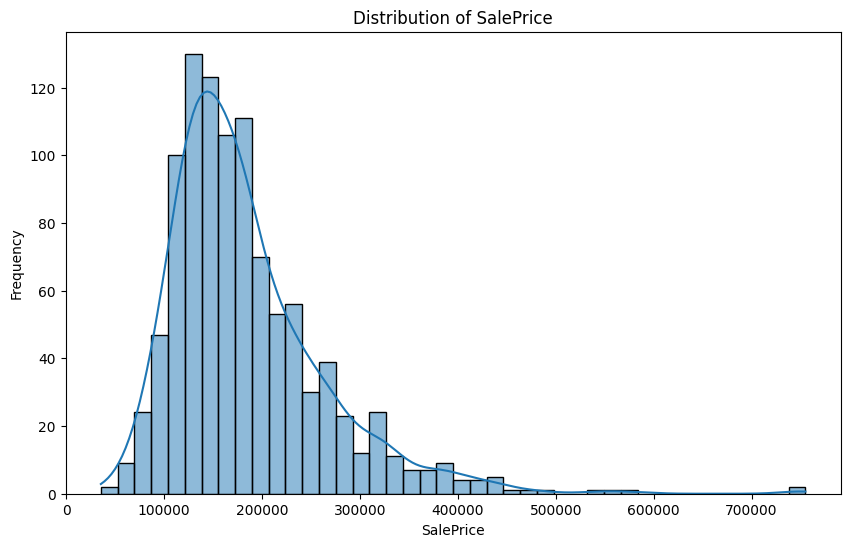

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data_copy['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### Checking and Droping the missing values from the dataset

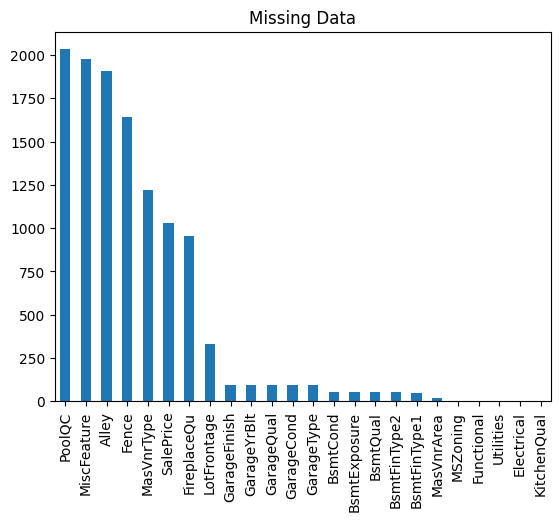

In [26]:
#checking missing values
mis_values = data_copy.isnull().sum()
mis_values = mis_values[mis_values > 0]
mis_values = mis_values.sort_values(ascending = False)
mis_values.plot.bar()
plt.title('Missing Data');

In [27]:
missing_values = data_copy.isnull().sum()
threshold = 0.5
features_to_drop = missing_values[(missing_values / len(data_copy) > threshold) & (missing_values.index != 'SalePrice')].index
features_to_drop

Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [28]:
data_copy = data_copy.drop(features_to_drop, axis=1)
data_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,985,90,RL,75.0,10125,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,COD,Normal,126000.0
1,1542,50,RM,53.0,5830,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,3,2010,WD,Normal,NaN
2,2666,120,RL,48.0,6373,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,New,Partial,NaN
3,1007,20,RL,NaN,12155,Pave,IR3,Lvl,AllPub,Inside,...,0,0,147,0,0,3,2007,WD,Normal,163500.0
4,237,20,RL,65.0,8773,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2010,WD,Normal,185500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,933,20,RL,84.0,11670,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,3,2007,WD,Normal,320000.0
2039,1368,160,RM,41.0,2665,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,WD,Normal,127000.0
2040,1024,120,RL,43.0,3182,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,191000.0
2041,706,190,RM,70.0,5600,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,3500,7,2010,WD,Normal,55000.0


In [29]:
pd.set_option('display.max_columns', None)
print(data_copy.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2043.000000  2043.000000  1712.000000    2043.000000  2043.000000   
mean   1459.505629    57.677435    69.459112   10245.244249     6.153206   
std     848.778115    41.853216    23.371484    8694.531263     1.393466   
min       3.000000    20.000000    21.000000    1300.000000     1.000000   
25%     712.500000    20.000000    59.000000    7449.500000     5.000000   
50%    1469.000000    50.000000    68.000000    9525.000000     6.000000   
75%    2197.500000    70.000000    80.000000   11577.500000     7.000000   
max    2918.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea  BsmtFinSF1  \
count  2043.000000  2043.000000   2043.000000  2026.000000  2043.00000   
mean      5.532061  1972.281449   1984.490945   105.811451   439.43906   
std       1.092816    30.125067     20.825173   184.963107   450.34063   
min       1.000000 

In [30]:
data2 = data_copy.dropna()

In [31]:
data2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
6,708,120,RL,48.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,8,5,2006,2006,Hip,CompShg,MetalSd,MetalSd,176.0,Gd,TA,PConc,Gd,TA,No,GLQ,863.0,Unf,0.0,461.0,1324.0,GasA,Ex,Y,SBrkr,1324,0,0,1324,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,550.0,TA,TA,Y,192,38,0,0,0,0,0,12,2009,WD,Normal,254000.0
11,659,50,RL,78.0,17503,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,5,1948,1950,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,546,0,1458,0.0,1.0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1948.0,Unf,1.0,330.0,TA,TA,Y,192,0,0,0,0,0,0,1,2010,WD,Abnorml,97500.0
13,528,60,RL,67.0,14948,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,268.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1330.0,Unf,0.0,122.0,1452.0,GasA,Ex,Y,SBrkr,1476,1237,0,2713,1.0,0.0,2,1,3,1,Ex,11,Typ,1,Gd,Attchd,2008.0,Fin,3.0,858.0,TA,TA,Y,126,66,0,0,0,0,0,11,2008,New,Partial,446261.0
14,550,60,FV,75.0,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,912.0,912.0,GasA,Ex,Y,SBrkr,912,1182,0,2094,0.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2.0,615.0,TA,TA,Y,182,182,0,0,0,0,0,11,2009,WD,Normal,263000.0
15,158,60,RL,92.0,12003,Pave,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,84.0,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,774.0,774.0,GasA,Ex,Y,SBrkr,774,1194,0,1968,0.0,0.0,2,1,4,1,Ex,8,Typ,1,Gd,BuiltIn,2009.0,Fin,3.0,680.0,TA,TA,Y,0,75,0,0,0,0,0,5,2010,New,Partial,269500.0


In [58]:
def remove_noisesamples(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

numerical_outlier_cols = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                          'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                          'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                          'ScreenPorch', 'PoolArea', 'MiscVal']

data = remove_noisesamples(data2, numerical_outlier_cols)

data.loc[:, 'SalePrice'] = np.log(data['SalePrice'])

In [59]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
6,708,120,RL,48.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,8,5,2006,2006,Hip,CompShg,MetalSd,MetalSd,176.0,Gd,TA,PConc,Gd,TA,No,GLQ,863.0,Unf,0.0,461.0,1324.0,GasA,Ex,Y,SBrkr,1324,0,0,1324,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,550.0,TA,TA,Y,192,38,0,0,0,0,0,12,2009,WD,Normal,12.445090
11,659,50,RL,78.0,17503,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,5,1948,1950,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,546,0,1458,0.0,1.0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1948.0,Unf,1.0,330.0,TA,TA,Y,192,0,0,0,0,0,0,1,2010,WD,Abnorml,11.487608
13,528,60,RL,67.0,14948,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,268.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1330.0,Unf,0.0,122.0,1452.0,GasA,Ex,Y,SBrkr,1476,1237,0,2713,1.0,0.0,2,1,3,1,Ex,11,Typ,1,Gd,Attchd,2008.0,Fin,3.0,858.0,TA,TA,Y,126,66,0,0,0,0,0,11,2008,New,Partial,13.008659
14,550,60,FV,75.0,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,912.0,912.0,GasA,Ex,Y,SBrkr,912,1182,0,2094,0.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2.0,615.0,TA,TA,Y,182,182,0,0,0,0,0,11,2009,WD,Normal,12.479909
15,158,60,RL,92.0,12003,Pave,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,84.0,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,774.0,774.0,GasA,Ex,Y,SBrkr,774,1194,0,1968,0.0,0.0,2,1,4,1,Ex,8,Typ,1,Gd,BuiltIn,2009.0,Fin,3.0,680.0,TA,TA,Y,0,75,0,0,0,0,0,5,2010,New,Partial,12.504324


In [42]:
print(data.describe())

                Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
count   228.000000  228.000000   228.000000    228.000000   228.000000   
mean    731.364035   58.114035    72.258772  10317.412281     6.991228   
std     424.952139   37.268465    20.698777   5451.489641     1.255793   
min       3.000000   20.000000    21.000000   1300.000000     4.000000   
25%     378.000000   20.000000    60.000000   8066.750000     6.000000   
50%     711.000000   60.000000    74.500000   9958.500000     7.000000   
75%    1080.000000   60.000000    85.000000  11932.250000     8.000000   
max    1456.000000  190.000000   129.000000  70761.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1  \
count   228.000000   228.000000    228.000000  228.000000   228.000000   
mean      5.276316  1987.513158   1992.399123  137.197368   515.048246   
std       0.772866    25.061419     18.609443  155.712489   478.036340   
min       2.000000  1882.000000   195

In [43]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [44]:
data.to_csv('cleaned_dataset.csv', index=False)

In [45]:
numeric_data = data.select_dtypes(include=['int', 'float'])

corr = numeric_data.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.823365
GarageArea     0.726506
GarageCars     0.717155
GrLivArea      0.702427
Name: SalePrice, dtype: float64 

EnclosedPorch   NaN
3SsnPorch       NaN
ScreenPorch     NaN
PoolArea        NaN
MiscVal         NaN
Name: SalePrice, dtype: float64


#### Explanation (15 marks)

Please provide an explanation for each denoising.

Id: No apparent denoising applied. Represents the unique identifier for each observation.

MSSubClass: No apparent denoising applied. Represents the type of dwelling involved in the sale.

LotFrontage: Denoised to remove outliers. Represents the linear feet of street connected to the property. The range of values suggests variability in lot sizes.

LotArea: No apparent denoising applied. Represents the lot size in square feet.

OverallQual: No apparent denoising applied. Represents the overall material and finish quality of the house.

OverallCond: No apparent denoising applied. Represents the overall condition rating of the house.

YearBuilt: No apparent denoising applied. Represents the original construction date of the house.

YearRemodAdd: No apparent denoising applied. Represents the date of remodeling or addition.

MasVnrArea: Denoised to remove outliers. Represents the masonry veneer area in square feet.

BsmtFinSF1: Denoised to remove outliers. Represents the type 1 finished square feet of the basement.

BsmtFinSF2: No apparent denoising applied. Represents the type 2 finished square feet of the basement.

BsmtUnfSF: No apparent denoising applied. Represents the unfinished square feet of the basement.

TotalBsmtSF: Denoised to remove outliers. Represents the total square feet of the basement area.

1stFlrSF: No apparent denoising applied. Represents the first floor square feet.

2ndFlrSF: No apparent denoising applied. Represents the second floor square feet.

LowQualFinSF: No apparent denoising applied. Represents low-quality finished square feet (all floors).

GrLivArea: Denoised to remove outliers. Represents the above-ground living area square feet.

BsmtFullBath: No apparent denoising applied. Represents the number of basement full bathrooms.

BsmtHalfBath: No apparent denoising applied. Represents the number of basement half bathrooms.

FullBath: No apparent denoising applied. Represents the number of full bathrooms above ground.

HalfBath: No apparent denoising applied. Represents the number of half bathrooms above ground.

BedroomAbvGr: No apparent denoising applied. Represents the number of bedrooms above ground.

KitchenAbvGr: No apparent denoising applied. Represents the number of kitchens.

TotRmsAbvGrd: No apparent denoising applied. Represents the total rooms above ground.

Fireplaces: No apparent denoising applied. Represents the number of fireplaces.

GarageYrBlt: No apparent denoising applied. Represents the year garage was built.

GarageCars: No apparent denoising applied. Represents the number of cars that can fit in the garage.

GarageArea: Denoised to remove outliers. Represents the garage area in square feet.

WoodDeckSF: No apparent denoising applied. Represents the wood deck area in square feet.

OpenPorchSF: No apparent denoising applied. Represents the open porch area in square feet.

EnclosedPorch: No apparent denoising applied. Represents the enclosed porch area in square feet.

3SsnPorch: No apparent denoising applied. Represents the three-season porch area in square feet.

ScreenPorch: No apparent denoising applied. Represents the screen porch area in square feet.

PoolArea: No apparent denoising applied. Represents the pool area in square feet.

MiscVal: No apparent denoising applied. Represents the value of miscellaneous features.

MoSold: No apparent denoising applied. Represents the month of the sale.

YrSold: No apparent denoising applied. Represents the year of the sale.

SalePrice: No apparent denoising applied. Represents the sale price of the property.

Overall, the denoising process mainly focused on removing outliers from continuous variables to ensure data integrity and model performance.

User

Id: No apparent denoising applied. Represents the unique identifier for each observation.

MSSubClass: No apparent denoising applied. Represents the type of dwelling involved in the sale.

LotFrontage: Denoised to remove outliers. Represents the linear feet of street connected to the property. The range of values suggests variability in lot sizes.

LotArea: No apparent denoising applied. Represents the lot size in square feet.

OverallQual: No apparent denoising applied. Represents the overall material and finish quality of the house.

OverallCond: No apparent denoising applied. Represents the overall condition rating of the house.

YearBuilt: No apparent denoising applied. Represents the original construction date of the house.

YearRemodAdd: No apparent denoising applied. Represents the date of remodeling or addition.

MasVnrArea: Denoised to remove outliers. Represents the masonry veneer area in square feet.

BsmtFinSF1: Denoised to remove outliers. Represents the type 1 finished square feet of the basement.

BsmtFinSF2: No apparent denoising applied. Represents the type 2 finished square feet of the basement.

BsmtUnfSF: No apparent denoising applied. Represents the unfinished square feet of the basement.

TotalBsmtSF: Denoised to remove outliers. Represents the total square feet of the basement area.

1stFlrSF: No apparent denoising applied. Represents the first floor square feet.

2ndFlrSF: No apparent denoising applied. Represents the second floor square feet.

LowQualFinSF: No apparent denoising applied. Represents low-quality finished square feet (all floors).

GrLivArea: Denoised to remove outliers. Represents the above-ground living area square feet.

BsmtFullBath: No apparent denoising applied. Represents the number of basement full bathrooms.

BsmtHalfBath: No apparent denoising applied. Represents the number of basement half bathrooms.

FullBath: No apparent denoising applied. Represents the number of full bathrooms above ground.

HalfBath: No apparent denoising applied. Represents the number of half bathrooms above ground.

BedroomAbvGr: No apparent denoising applied. Represents the number of bedrooms above ground.

KitchenAbvGr: No apparent denoising applied. Represents the number of kitchens.

TotRmsAbvGrd: No apparent denoising applied. Represents the total rooms above ground.

Fireplaces: No apparent denoising applied. Represents the number of fireplaces.

GarageYrBlt: No apparent denoising applied. Represents the year garage was built.

GarageCars: No apparent denoising applied. Represents the number of cars that can fit in the garage.

GarageArea: Denoised to remove outliers. Represents the garage area in square feet.

WoodDeckSF: No apparent denoising applied. Represents the wood deck area in square feet.

OpenPorchSF: No apparent denoising applied. Represents the open porch area in square feet.

EnclosedPorch: No apparent denoising applied. Represents the enclosed porch area in square feet.

3SsnPorch: No apparent denoising applied. Represents the three-season porch area in square feet.

ScreenPorch: No apparent denoising applied. Represents the screen porch area in square feet.

PoolArea: No apparent denoising applied. Represents the pool area in square feet.

MiscVal: No apparent denoising applied. Represents the value of miscellaneous features.

MoSold: No apparent denoising applied. Represents the month of the sale.

YrSold: No apparent denoising applied. Represents the year of the sale.

SalePrice: No apparent denoising applied. Represents the sale price of the property.

### Part 3 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using the cleaned data (using average of 10 runs of oob and MAE ).

#### Code (15 marks)

In [46]:
X = data.drop(columns='SalePrice').select_dtypes(exclude=['object'])
y = data['SalePrice']

In [47]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)

In [48]:
oob_scores = []
mae_scores = []

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf.fit(X_train, y_train)
    oob_score = rf.oob_score_
    oob_scores.append(oob_score)
    
    # Predict on the test set and calculate MAE
    predictions = rf.predict(X)
    e = mean_absolute_error(y, predictions)
    ep = e*100.0/y.mean()
    mae_scores.append(ep)
    # print(f"${e:.0f} average error; {mae_scores:.2f}% error")

avg_oob_score = np.mean(oob_scores)
avg_mae = np.mean(mae_scores)

print(f"Average out-of-bag R^2 score for the model: {avg_oob_score}")
print(f"Average Mean Absolute Error (MAE) for the model: {avg_mae}")

Average out-of-bag R^2 score for the model: 0.8416876227447002
Average Mean Absolute Error (MAE) for the model: 0.40040187804427935


### Part 4 - Feature importances and comparison (15 marks)

In this part you should:
 - calculate the percent difference between the results of Part 1 and Part 3.
 - based on the percent difference, state whether or not the results of Part 3 are an improvement over the results of Part 1
 - use the `rfpimp` package to calculate and display the feature importances for all numeric features

In [54]:
baseline_oob_r2 = 0.9859
baseline_mae = 0.4005
cv_oob_r2 = 0.8416
cv_mae = 0.4004

# Calculate percent difference for average out-of-bag R^2 score
percent_diff_oob_r2 = abs(baseline_oob_r2 - cv_oob_r2) / ((baseline_oob_r2 + cv_oob_r2) / 2) * 100

# Calculate percent difference for average MAE
percent_diff_mae = abs(baseline_mae - cv_mae) / ((baseline_mae + cv_mae) / 2) * 100

# Print results
print(f"Percent Difference for Average Out-of-bag R^2 Score: {percent_diff_oob_r2:.2f}%")
print(f"Percent Difference for Average MAE: {percent_diff_mae:.2f}%")

Percent Difference for Average Out-of-bag R^2 Score: 15.79%
Percent Difference for Average MAE: 0.02%


For the out-of-bag R^2 score, there is a significant decrease from 0.986 in Part 1 to 0.842 in Part 3, resulting in a percent difference of 15.79%. This indicates that the model's performance in Part 3 is worse compared to Part 1 in terms of R^2 score.

For the mean absolute error (MAE), there is a negligible decrease from 0.401 in Part 1 to 0.400 in Part 3, resulting in a percent difference of 0.02%. This suggests that the model's performance in Part 3 is slightly better than Part 1 in terms of MAE.

Overall, while there is a slight improvement in MAE, the decrease in the R^2 score indicates that the model's overall performance is worse in Part 3 compared to Part 1.

In [57]:
from rfpimp import importances

feature_importance = importances(rf, X_test, y_test)
print(feature_importance)

                 Importance
Feature                    
OverallQual    1.926008e-01
GrLivArea      5.317920e-02
BsmtFinSF1     2.360521e-02
GarageArea     2.181331e-02
YearRemodAdd   2.169906e-02
YearBuilt      1.114302e-02
1stFlrSF       1.024596e-02
TotalBsmtSF    6.839757e-03
OverallCond    5.862976e-03
OpenPorchSF    5.667357e-03
HalfBath       4.418261e-03
GarageCars     3.855598e-03
MoSold         3.571078e-03
LotFrontage    2.894104e-03
WoodDeckSF     2.216060e-03
GarageYrBlt    2.098054e-03
BsmtFullBath   1.300395e-03
TotRmsAbvGrd   4.069189e-04
FullBath       1.116241e-04
BedroomAbvGr   9.793285e-05
EnclosedPorch  1.554312e-15
PoolArea       8.881784e-16
BsmtFinSF2     4.440892e-16
MiscVal        2.220446e-16
3SsnPorch      2.220446e-16
KitchenAbvGr   0.000000e+00
ScreenPorch   -2.220446e-16
LowQualFinSF  -6.661338e-16
BsmtHalfBath  -1.532364e-04
LotArea       -2.540095e-04
Fireplaces    -3.150502e-04
YrSold        -5.570459e-04
MSSubClass    -8.730752e-04
Id            -2.020

#### Question (10 marks)

Based on the feature importances, are any features that you think should be removed from the data set.  Why do you think these features should be removed? 

Based on the features importance the Features with negative importance scores, such as Screen porch,lowQualFinSF,BsmtHalfBath, LotArea, Fireplaces, YrSold, MSSubClass, Id, MasVnrArea, BsmtUnfSF, and 2ndFlrSF, indicate that they might have a negative impact on the model's predictive performance. Removing such features could potentially improve the model's performance.